In [1]:
from slmfunctions.dependencies import *
from slmfunctions.settings import *
from slmfunctions.general import *
from slmfunctions.imageprocessing import *
from slmfunctions.phaseretrieval import *

3by3_3spacing_phase


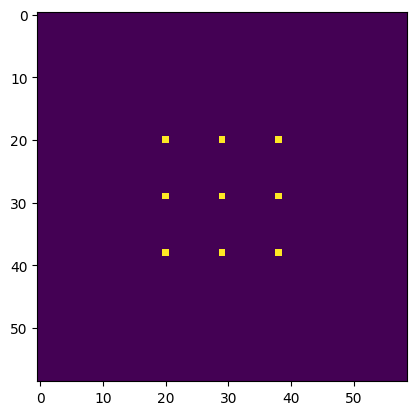

In [2]:
### Initialize tweezers
# x, y notation: x refers to the column, y to the row. So 
# when referencing in arrays, [y,x] is correct. 

tweezers = gen_tweezers_precise(1,1,3*precision,3*precision,int(sizepix*19.9/32*precision),int(sizepix*20.1/32*precision),int(sizepix*15.9/32*precision),int(sizepix*16.1/32*precision)) / 255
tweezers_subimage, miny, maxy, minx, maxx = tweezerscrop(tweezers, 20)
plt.imshow(tweezers_subimage)
imgname = f"3by3_{precision}spacing_phase" # DEFINE NAME FIRST
print(imgname)

3
3


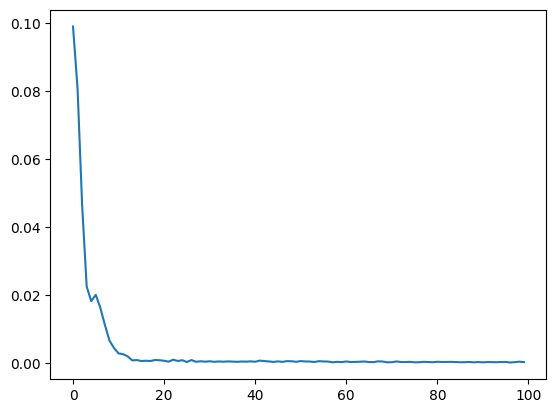

In [3]:
### derive phase pattern. (Can pick between optimizing initial phase offsets or not)


angles, sawtoothinitinputs = sawtooths(tweezers, sizepix)
# f_sawtoothint, f_sawtoothkphase = fourier(np.ones(np.shape(sawtoothinitinputs)), sawtoothinitinputs)
# f_sawtoothint[sizepix//2 - 3*precision:sizepix//2+3*precision,sizepix//2 - 3*precision:sizepix//2+3*precision] = 0
slmphase, convergenceerror, tweezers_simulated = derivephase(tweezers, np.ones(np.shape(sawtoothinitinputs)), sawtoothinitinputs, tweezers, 100, 650)
plt.loglog(convergenceerror)

In [6]:
# Convert to image files, and store!
import os
save_dir = r'C:\cleen\nsong\2-Research\UAC Research\PhaseStorage\May2024'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
phaseimg_path = os.path.join(save_dir, f"{imgname}_phase.bmp")
intimg_path = os.path.join(save_dir, f"{imgname}_virtualint.jpg")


saver = np.zeros((1200,1920))
saver[0:1200,int(1920/2-sizepix/2):int(1920/2+sizepix/2)] = slmphase[50:1250,:] / np.max(slmphase[50:1250,:])*255
phaseimg = (Image.fromarray(saver).convert('RGB'))
virtualintimg = (Image.fromarray(tweezers_simulated / np.max(tweezers_simulated) * 255).convert('RGB'))
phaseimg.save(phaseimg_path)
virtualintimg.save(intimg_path)

#####################################################3

In [10]:
save_dir = r'C:\cleen\nsong\2-Research\UAC Research\PhaseStorage\May2024'
phaseimg_path = os.path.join(save_dir, f"{imgname}_phase.bmp")
intimg_path = os.path.join(save_dir, f"{imgname}_virtualint.jpg")

phaseimg = np.array(Image.open(phaseimg_path).convert('L')) / 255*2*np.pi - np.pi
intensityimg = np.array(Image.open(intimg_path).convert('L'))
